In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dat = np.loadtxt('dat.csv', delimiter=',')

In [46]:
n=10#how big of a cluster of measurements
nsims = 10000 #how many draws to make
results = np.zeros(nsims)#pre-allocate the array for results
for i in range(nsims):
    inds = np.random.randint(dat.shape[0], size=n)# randomly select n integers between 0 and number of samples in lysate column
    v = np.var(dat[inds])#calculate sample variance over randomly selected sample
    results[i] = v#store results from this simatlion

The 99% threshold=2.8


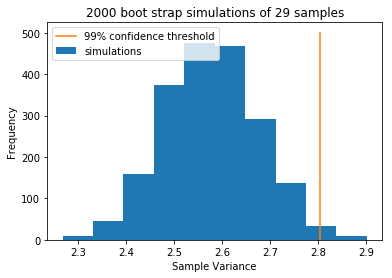

In [64]:
plt.hist(results);plt.xlabel('Sample Variance');plt.ylabel('Frequency');
plt.title(str(nsims) + ' boot strap simulations of '+ str(n) + ' samples')
confidence_level = 99
threshold = np.percentile(results, confidence_level)
plt.plot([threshold,threshold], [0,500])
print('The 99% threshold='+ str(np.round(threshold,2)))
plt.legend(['99% confidence threshold','simulations', ]);

So assuming typical variation between measurements in the lysate column is what you would expect for a homogenous solution and the rest of the variation just comes from measurement error then if the sample variance across n real measurements is greater than the 99% threshold above it would be highly unlikely you would see that by chance and the samples are probably more heterogenous then you would expect from measurement noise.

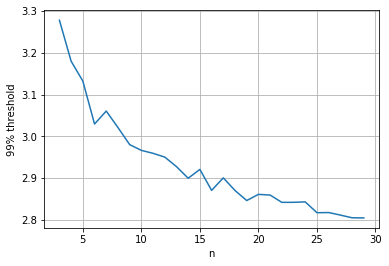

In [65]:
#now lets try simulation with diferent n's 
thresholds=[]
ns = range(3,30)
for n in ns:
    nsims = 2000 #how many draws to make
    results = np.zeros(nsims)#pre-allocate the array for results
    for i in range(nsims):
        inds = np.random.randint(dat.shape[0], size=n)# randomly select n integers between 0 and number of samples in lysate column
        v = np.var(dat[inds])#calculate sample variance over randomly selected sample
        results[i] = v#store results from this simatlion
    p = np.percentile(results,99)
    thresholds.append(p)
    
plt.plot(ns, thresholds)
plt.ylabel('99% threshold');plt.xlabel('n')
plt.grid()

It is clear rom the plot that with a lower number of samples we need to set our threshold higher. Though there are diminishing returns probably somehwere around 10 samples.
